In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis.rms import RMSD
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load trajectory files
ref_traj = '/home/annika/md_sims/official_extraction/new_md_results/end.pdb'
old_traj = '/home/annika/md_sims/official_extraction/new_md_results/prod.dcd'
new_traj_file = '/home/annika/md_sims/adding_superimposition.dcd'

In [3]:
# Create MDAnalysis universe
u_ref = mda.Universe(ref_traj, old_traj)
u_traj = mda.Universe(ref_traj, new_traj_file)

/home/annika/miniconda3/envs/mdanalysis/lib/python3.11/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [4]:
# Calculate RMSD
rmsd_analysis = RMSD(u_traj, select="protein and name CA", reference=u_ref, groupselections=["protein"], verbose=True)
rmsd_analysis.run()

  0%|          | 0/5000 [00:00<?, ?it/s]

In [8]:
# Extract RMSD values and timesteps
rmsd_values = rmsd_analysis.rmsd[:, 2]  # Third column contains the RMSD values
timesteps = np.arange(len(rmsd_values)) * 0.002

/home/annika/miniconda3/envs/mdanalysis/lib/python3.11/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


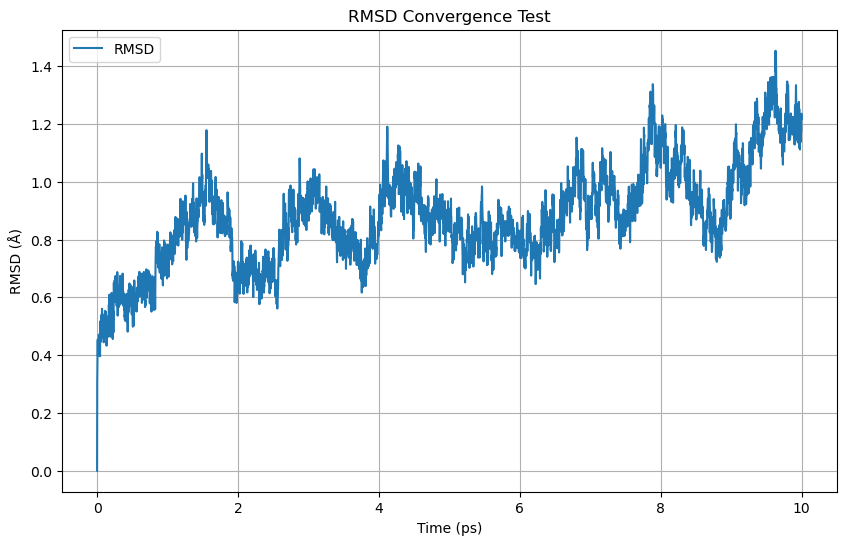

In [9]:
# Plot RMSD values
plt.figure(figsize=(10, 6))
plt.plot(timesteps, rmsd_values, label="RMSD")
plt.xlabel("Time (ps)")
plt.ylabel("RMSD (Å)")
plt.title("RMSD Convergence Test")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Perform convergence test (same code as before)
def convergence_test(values, threshold=0.1, window_size=10):
    for i in range(window_size, len(values)):
        window_mean = np.mean(values[i - window_size : i])
        if np.abs(window_mean - values[i]) > threshold:
            return False
    return True

In [11]:
# Define convergence parameters
convergence_threshold = 0.1
convergence_window_size = 10

In [12]:
# Perform the convergence test
is_converged = convergence_test(rmsd_values, convergence_threshold, convergence_window_size)

if is_converged:
    print("Convergence achieved.")
else:
    print("Convergence not achieved.")

Convergence not achieved.
